In [11]:
!nvidia-smi

Wed Apr  9 21:24:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [14]:
cd ..

/content


In [10]:
import os
HOME = os.getcwd()
print(HOME)

/content/datasets


In [2]:
!pip install ultralytics==8.3.19

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.19 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.0/112.6 GB disk)


In [6]:
!pip install supervision[assets]==0.24.0

from IPython import display
display.clear_output()

import supervision as sv
print("supervision.__version__:", sv.__version__)

supervision.__version__: 0.24.0


In [18]:
from supervision.assets import download_assets, VideoAssets

SOURCE_VIDEO_PATH = download_assets(VideoAssets.VEHICLES)

  0%|          | 0/35345757 [00:00<?, ?it/s]

In [12]:
from ultralytics import YOLO

#model = YOLO("yolov8x.pt")
model = YOLO("/content/datasets/runs/detect/train/weights/best.pt")

In [13]:
CLASS_NAMES_DICT = model.model.names
CLASS_NAMES_DICT

{0: 'candy'}

In [14]:
# dict maping class_id to class_name
CLASS_NAMES_DICT = model.model.names

# the class names we have chosen
#SELECTED_CLASS_NAMES = ['car', 'motorcycle', 'bus', 'truck']
SELECTED_CLASS_NAMES = ['candy']

# class ids matching the class names we have chosen
SELECTED_CLASS_IDS = [
    {value: key for key, value in CLASS_NAMES_DICT.items()}[class_name]
    for class_name
    in SELECTED_CLASS_NAMES
]

In [16]:
 SOURCE_VIDEO_PATH='/content/70899749.mp4'

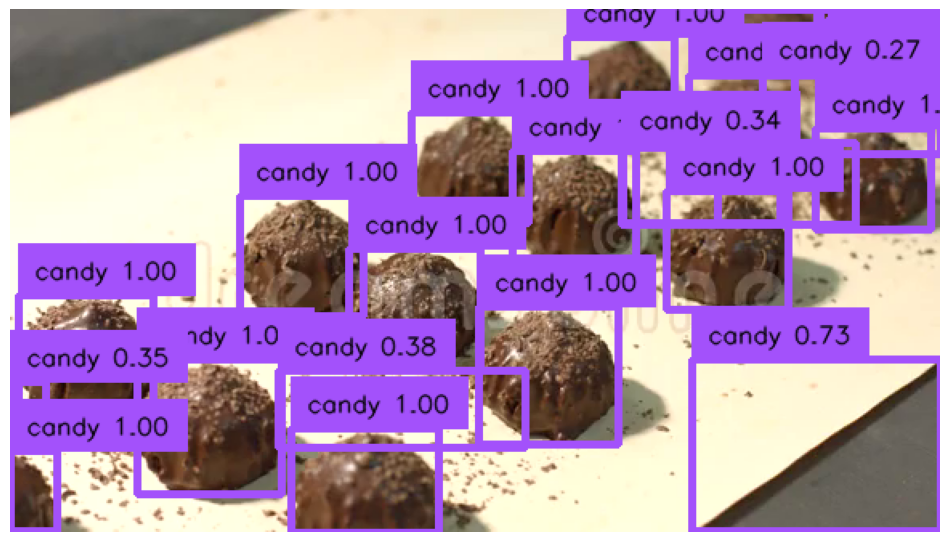

In [17]:
import supervision as sv

import numpy as np

# create frame generator
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator and LabelAnnotator
box_annotator = sv.BoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=1, text_scale=0.5, text_color=sv.Color.BLACK)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model(frame, verbose=False)[0]

# convert to Detections
detections = sv.Detections.from_ultralytics(results)
# only consider class id from selected_classes define above
detections = detections[np.isin(detections.class_id, SELECTED_CLASS_IDS)]

# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for confidence, class_id in zip(detections.confidence, detections.class_id)
]

# annotate and display frame
annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame, detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame, detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_frame)


In [8]:
# # settings
# LINE_START = sv.Point(0 + 50, 1500)
# LINE_END = sv.Point(3840 - 50, 1500)

# TARGET_VIDEO_PATH = f"{HOME}/result.mp4"

In [18]:
# settings
LINE_START = sv.Point(50, 50)
LINE_END = sv.Point(580 - 50, 326-50)

TARGET_VIDEO_PATH = f"{HOME}/result.mp4"

In [60]:
sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=580, height=326, fps=25, total_frames=285)

In [34]:
# import ffmpeg

# def convert_webm_to_mp4(input_path, output_path):
#     # Use ffmpeg to convert the video
#     ffmpeg.input(input_path).output(output_path, vcodec='libx264', acodec='aac').run()

# # Example usage
# input_webm = '/content/70899749.webm'
# output_mp4 = '/content/70899749.mp4'

# convert_webm_to_mp4(input_webm, output_mp4)
# print(f"Conversion complete: {output_mp4}")


Conversion complete: /content/70899749.mp4


In [19]:
# # create BYTETracker instance
# byte_tracker = sv.ByteTrack(
#     track_activation_threshold=0.25,
#     lost_track_buffer=30,
#     minimum_matching_threshold=0.8,
#     frame_rate=30,
#     minimum_consecutive_frames=3)

# byte_tracker.reset()

# # create VideoInfo instance
# video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# # create frame generator
# generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# # create LineZone instance, it is previously called LineCounter class
# line_zone = sv.LineZone(start=LINE_START, end=LINE_END)

# # create instance of BoxAnnotator, LabelAnnotator, and TraceAnnotator
# box_annotator = sv.BoxAnnotator(thickness=4)
# label_annotator = sv.LabelAnnotator(text_thickness=2, text_scale=1.5, text_color=sv.Color.BLACK)
# trace_annotator = sv.TraceAnnotator(thickness=4, trace_length=50)

# # create LineZoneAnnotator instance, it is previously called LineCounterAnnotator class
# line_zone_annotator = sv.LineZoneAnnotator(thickness=4, text_thickness=4, text_scale=2)

# # define call back function to be used in video processing
# def callback(frame: np.ndarray, index: int) -> np.ndarray:
#     # model prediction on single frame and conversion to supervision Detections
#     results = model(frame, verbose=False)[0]
#     detections = sv.Detections.from_ultralytics(results)
#     # only consider class id from selected_classes define above
#     detections = detections[np.isin(detections.class_id, SELECTED_CLASS_IDS)]
#     # tracking detections
#     detections = byte_tracker.update_with_detections(detections)
#     labels = [
#         f"#{tracker_id} {model.model.names[class_id]} {confidence:0.2f}"
#         for confidence, class_id, tracker_id
#         in zip(detections.confidence, detections.class_id, detections.tracker_id)
#     ]
#     annotated_frame = frame.copy()
#     annotated_frame = trace_annotator.annotate(
#         scene=annotated_frame, detections=detections)
#     annotated_frame = box_annotator.annotate(
#         scene=annotated_frame, detections=detections)
#     annotated_frame = label_annotator.annotate(
#         scene=annotated_frame, detections=detections, labels=labels)

#     # update line counter
#     line_zone.trigger(detections)
#     # return frame with box and line annotated result
#     return line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)

# # process the whole video
# sv.process_video(
#     source_path = SOURCE_VIDEO_PATH,
#     target_path = TARGET_VIDEO_PATH,
#     callback=callback
# )

In [64]:
# create BYTETracker instance
byte_tracker = sv.ByteTrack(
    track_activation_threshold=0.25,
    lost_track_buffer=30,
    minimum_matching_threshold=0.8,
    frame_rate=30,
    minimum_consecutive_frames=3)

byte_tracker.reset()

# create VideoInfo instance
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# create frame generator
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# create LineZone instance, it is previously called LineCounter class
line_zone = sv.LineZone(start=LINE_START, end=LINE_END )

# create instance of BoxAnnotator, LabelAnnotator, and TraceAnnotator
box_annotator = sv.BoxAnnotator(thickness=2)
label_annotator = sv.LabelAnnotator(text_thickness=1, text_scale=0.5, text_color=sv.Color.BLACK)
trace_annotator = sv.TraceAnnotator(thickness=4, trace_length=50)

# create LineZoneAnnotator instance, it is previously called LineCounterAnnotator class
line_zone_annotator = sv.LineZoneAnnotator(thickness=2, text_thickness=1, text_scale=0.5, text_color=sv.Color.WHITE, color=sv.Color.BLACK)

# define call back function to be used in video processing
def callback(frame: np.ndarray, index: int) -> np.ndarray:
    # model prediction on single frame and conversion to supervision Detections
    results = model(frame, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    # only consider class id from selected_classes define above
    detections = detections[np.isin(detections.class_id, SELECTED_CLASS_IDS)]
    # tracking detections
    detections = byte_tracker.update_with_detections(detections)
    labels = [
        f"#{tracker_id} {model.model.names[class_id]} {confidence:0.2f}"
        for confidence, class_id, tracker_id
        in zip(detections.confidence, detections.class_id, detections.tracker_id)
    ]
    annotated_frame = frame.copy()
    annotated_frame = trace_annotator.annotate(
        scene=annotated_frame, detections=detections)
    annotated_frame = box_annotator.annotate(
        scene=annotated_frame, detections=detections)
    annotated_frame = label_annotator.annotate(
        scene=annotated_frame, detections=detections, labels=labels)

    # update line counter
    line_zone.trigger(detections)
    # return frame with box and line annotated result
    return line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)

# process the whole video
sv.process_video(
    source_path = SOURCE_VIDEO_PATH,
    target_path = TARGET_VIDEO_PATH,
    callback=callback
)

#Training a dataset

In [3]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet

import roboflow


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.2 MB/s eta 0:00:00


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="PoxWN45ORahDVX11gRHi")
project = rf.workspace("roboflow-jvuqo").project("chocolate-candy")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to chocolate-candy-2 in yolov8:: 100%|██████████| 52/52 [00:00<00:00, 3119.82it/s]


In [5]:
from ultralytics import YOLO
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 98.9MB/s]
New https://pypi.org/project/ultralytics/8.3.105 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.19 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/chocolate-candy-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=N

In [23]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 121.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.6 MB/s eta 0:00:00


In [41]:
!pip install ffmpeg

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=2e6173c1fcbd3ef701500d33a32ea5575d60035a1a5f05dc67d7ae06699c587a
  Stored in directory: /root/.cache/pip/wheels/56/30/c5/576bdd729f3bc062d62a551be7fefd6ed2f761901568171e4e
Successfully built ffmpeg


In [ ]:
import gradio as gr
import cv2
import os



TARGET_VIDEO_PATH='/content/datasets/result.mp4'
# Example video processing function
def process_video(input_video):
    # Define output path where the processed video will be saved

    # create BYTETracker instance
    byte_tracker = sv.ByteTrack(
        track_activation_threshold=0.25,
        lost_track_buffer=30,
        minimum_matching_threshold=0.8,
        frame_rate=30,
        minimum_consecutive_frames=3)

    byte_tracker.reset()

    # create VideoInfo instance
    video_info = sv.VideoInfo.from_video_path(input_video)

    # create frame generator
    generator = sv.get_video_frames_generator(input_video)

    # create LineZone instance, it is previously called LineCounter class
    line_zone = sv.LineZone(start=LINE_START, end=LINE_END )

    # create instance of BoxAnnotator, LabelAnnotator, and TraceAnnotator
    box_annotator = sv.BoxAnnotator(thickness=2)
    label_annotator = sv.LabelAnnotator(text_thickness=1, text_scale=0.5, text_color=sv.Color.BLACK)
    trace_annotator = sv.TraceAnnotator(thickness=4, trace_length=50)

    # create LineZoneAnnotator instance, it is previously called LineCounterAnnotator class
    line_zone_annotator = sv.LineZoneAnnotator(thickness=2, text_thickness=1, text_scale=0.5, text_color=sv.Color.WHITE, color=sv.Color.BLACK)

    # define call back function to be used in video processing
    def callback(frame: np.ndarray, index: int) -> np.ndarray:
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame, verbose=False)[0]
        detections = sv.Detections.from_ultralytics(results)
        # only consider class id from selected_classes define above
        detections = detections[np.isin(detections.class_id, SELECTED_CLASS_IDS)]
        # tracking detections
        detections = byte_tracker.update_with_detections(detections)
        labels = [
            f"#{tracker_id} {model.model.names[class_id]} {confidence:0.2f}"
            for confidence, class_id, tracker_id
            in zip(detections.confidence, detections.class_id, detections.tracker_id)
        ]
        annotated_frame = frame.copy()
        annotated_frame = trace_annotator.annotate(
            scene=annotated_frame, detections=detections)
        annotated_frame = box_annotator.annotate(
            scene=annotated_frame, detections=detections)
        annotated_frame = label_annotator.annotate(
            scene=annotated_frame, detections=detections, labels=labels)

        # update line counter
        line_zone.trigger(detections)
        # return frame with box and line annotated result
        return line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)

    # Return the path to the processed video
    sv.process_video(
    source_path = input_video,
    target_path = TARGET_VIDEO_PATH,
    callback=callback
    )
    return TARGET_VIDEO_PATH

# Create a Gradio interface
interface = gr.Interface(
    fn=process_video,
    inputs=gr.Video(label="Upload Video"),
    outputs=gr.Video(label="Processed Video"),
)

# Launch the interface
interface.launch(debug=True)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://2e4418a61efb528ce0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
